**BAN**-**210_NAA**

**Predictive** **Analytics**

***Workshop-6***

**Maaz Hussain**

***ID # 173714221***

**Professor: Dr. Savita Seharawat**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Generate Synthetic Data
np.random.seed(42)  # For reproducibility
X = np.linspace(-10, 10, 100)  # 100 evenly spaced points
y = 3 * X**2 + 2 * X + 5 + np.random.normal(0, 10, size=len(X))  # Quadratic function with noise

# Convert X into a DataFrame for easier manipulation

In [4]:
X_df = pd.DataFrame(X, columns=['X'])

# Step 2: Visualize the Generated Data

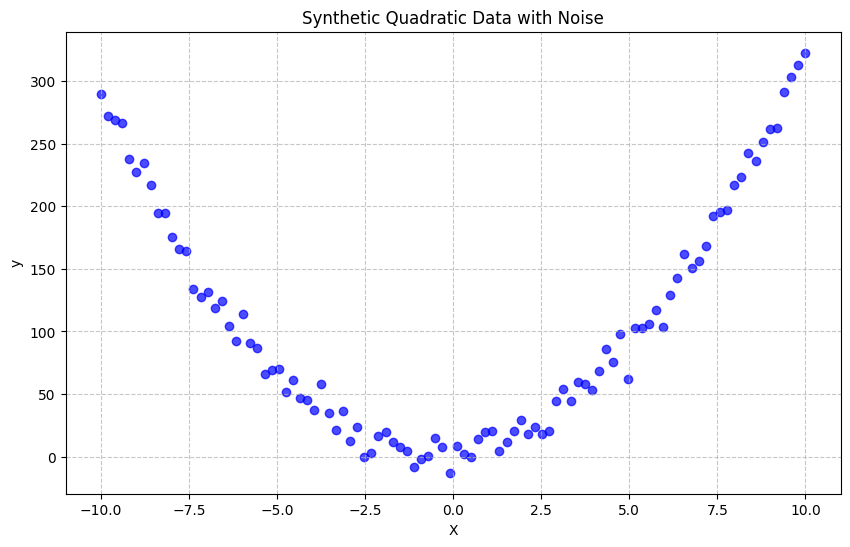

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('Synthetic Quadratic Data with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Step 3: Split into Train and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 80 samples
Test set size: 20 samples


# Step 4: Transform Data for Quadratic Regression

In [7]:
# Create polynomial features of degree 2 (quadratic)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of features after polynomial transformation: {X_train_poly.shape[1]}")
print(f"Feature names after transformation: {poly.get_feature_names_out(['X'])}")

Original number of features: 1
Number of features after polynomial transformation: 3
Feature names after transformation: ['1' 'X' 'X^2']


# Step 5: Train the Quadratic Model

In [10]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Display the model coefficients
coefficients = pd.DataFrame(
    {'Feature': poly.get_feature_names_out(['X']), 'Coefficient': model.coef_}
)
# Use pandas concat instead of the deprecated append method
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model.intercept_]})
coefficients = pd.concat([coefficients, intercept_df], ignore_index=True)
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
     Feature  Coefficient
0          1     0.000000
1          X     2.053504
2        X^2     3.018315
3  Intercept     3.179663


# Step 6: Make Predictions

In [12]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Step 7: Evaluate Model Performance

In [13]:
# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R^2: {test_r2:.4f}")


Model Performance:
Training MSE: 86.03
Training R^2: 0.9906
Test MSE: 61.96
Test R^2: 0.9907


# Step 8: Visualize the Fitted Model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


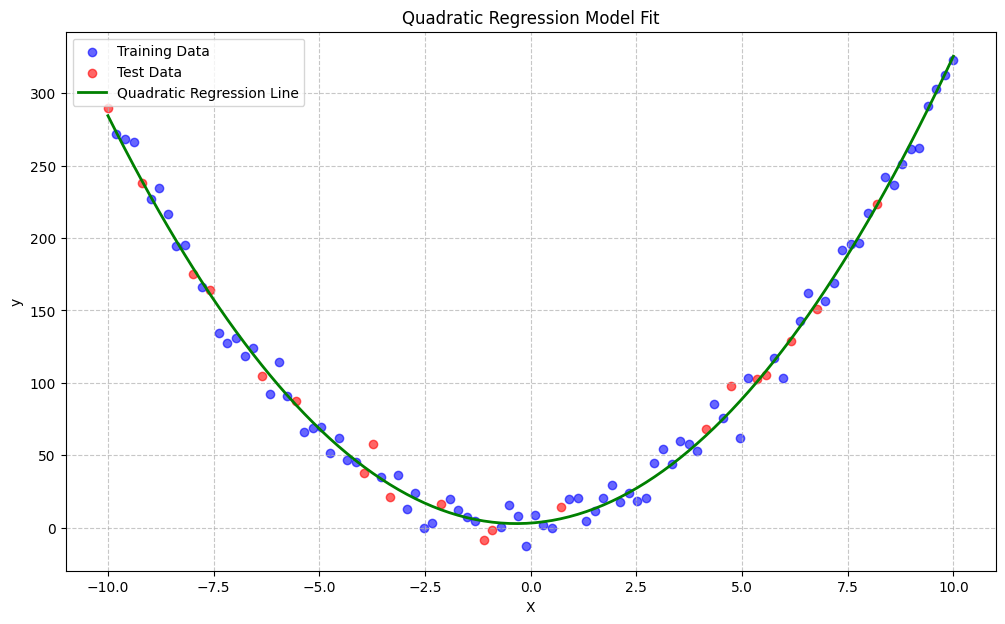

In [14]:
# Sort X values for a smooth curve
X_all = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_all_poly = poly.transform(X_all)
y_all_pred = model.predict(X_all_poly)

plt.figure(figsize=(12, 7))
# Plot original data points
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Test Data')
# Plot the predicted curve
plt.plot(X_all, y_all_pred, color='green', linewidth=2, label='Quadratic Regression Line')
plt.title('Quadratic Regression Model Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()